# Prueba para científico de datos

## Parte 1 - Cargar datos y estadísticas básicas

En la carpeta ```Data``` encontrará un archivo llamado ```diamonds.csv```. Este archivo contiene información de 53940 diamantes. Dentro de la información disponible, está el precio, el color, el peso, etc. Puede consultar las características completas del dataset en [este enlace](https://www.kaggle.com/shivam2503/diamonds).

1. Cargue el archivo en un dataframe de pandas 
2. Use los metodos que conozca para describir las propiedades básicas de los datos. 

In [1]:
# Respuesta a la parte 1

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")



In [2]:
#Se leen los datos
df = pd.read_csv("Data/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
#Eliminamos la primera columna que es inservible.
df=df.drop(["Unnamed: 0"],axis=1)
df.dropna(inplace=True)
df.shape

(53940, 10)

In [4]:
#Miramos el tipo de objeto que tenemos para cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
#Se verifican que no hayan valores nan
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#Se miran estadísticas principales de cada columna
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
#Se eliminan las columnas con dimension 0
df = df[(df[['x','y','z']] != 0).all(axis=1)]

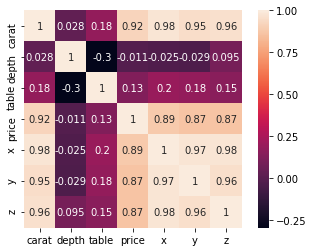

In [8]:
#Se crea la matriz de correlacion de las variables no categoricas.
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

## Parte 2 - Aprendizaje no supervisado

Usted desea encontrar estructura en los datos que le han sido dados. 
1. A partir del dataframe que cargó en el primer punto, use algún algoritmo de aprendizaje no supervisado para encontrar clusters de diamantes con propiedades similares. 
2. En una celda de markdown, describa una métrica/método que se pueda utilizar para evaluar la calidad de sus clusters.
3. Varie $k$ (la cantidad de clusters) de 1 a 10 y grafique su métrica en función de $k$
4. Qué $k$ describe mejor sus datos? 

In [9]:
# Respuesta a la parte 2 

#Se incluyen y se binrizan las variables categoricas en el dataset de estudio.
onedf=  pd.get_dummies(df)
onedf.head()


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
colmns = onedf.columns
df2 = pd.DataFrame(onedf,columns= colmns)
df2.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
#Se estandarizan las variables numericas

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(df2[['carat','depth','x','y','z','table']]),
                           columns=['carat','depth','x','y','z','table'],index=df2.index)

In [12]:
numericals.head()


,carat,depth,x,y,z,table
0,-1.198204,-0.174203,-1.591573,-1.539219,-1.580084,-1.099725
1,-1.240417,-1.361090,-1.645173,-1.662014,-1.750896,1.585988
2,-1.198204,-3.385781,-1.502241,-1.460280,-1.750896,3.376463
3,-1.071566,0.454149,-1.368242,-1.319943,-1.295396,0.243131
4,-1.029353,1.082501,-1.243176,-1.214690,-1.124583,0.243131


In [13]:
#Se incluyen en el dataset de estudio
df2_std = df2.copy(deep=True)
df2_std[['carat','depth','x','y','z','table']] = numericals[['carat','depth','x','y','z','table']]

In [14]:
df2_std.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [15]:
#Se utiliza el metodo de K-means para hallar los clusters de diamantes


def doKmeans(X, nclust=3):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df2_std, 3)
kmeans = pd.DataFrame(clust_labels)
df2_std.insert((df2_std.shape[1]),'kmeans',kmeans)

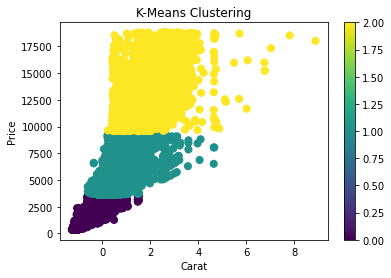

In [16]:
#Se plotean los clusters en funcion de las variables Price Vs Carat

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df2_std['carat'],df2_std['price'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
plt.colorbar(scatter)

Dado que se tienen variables categóricas y numéricas, era necesario binarizar las variables categóricas, pues un algoritmo como K-means solo puede procesar números enteros y contínuos. Para esto se usa el get_dummies que es una forma de OneHotEncoder que nos permite asignar una secuencia binaria a cada cateogoría. Para evaluar la calidad de los clusters se plotea un conjunto de variables que estén altamente relacionadas en la matriz de correlación realizada en el punto anterior, deben ser coherentes los clusters con las variables con coeficiente cercano a 1, esto nos permite analizar que el método de K-means fue una buena metodología para agrupar 3 conjuntos de diamantes. En la gráfica anterior, se evidencia por ejemplo, que la variable Carat no es tan decisiva en el precio, pues se pueden tener  diamantes con Carat=2 o 4 y de igual forma pueden tener un valor de 17500, estando agrupados en el mismo cluster (amarillo.)

Text(0.5, 1.0, 'Elbow Method')

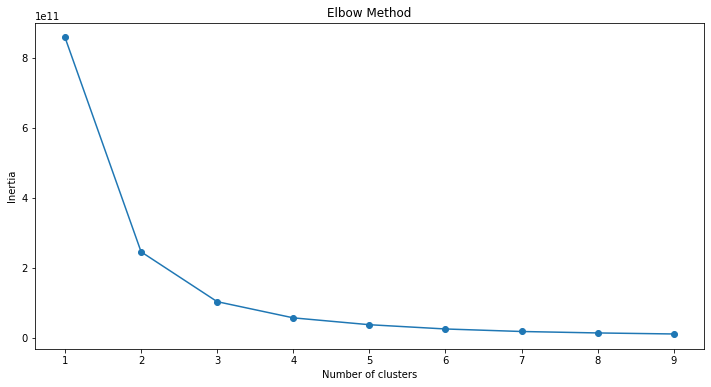

In [17]:
df2_std[df2_std==np.inf]=np.nan
df2_std.fillna(df2_std.mean(), inplace=True)

linear=df2_std.copy()
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df2_std)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

Se utilizó el método de Elbow para encontrar el número apropiado de clústers para esta situación en particular. En una gráfica de Inertia o Dispersión  Vs Número de clústers, se evidencia que el rango óptimo está entre 2-3 clústers, pues escoger una cantidad menor aumentaría considerablemente la dispersión en el trato de los datos y al escoger una cantidad mayor se arriesga a tener una tendencia a cero.Hay que tener en cuenta que el eje y tiene un orden de magnitud 1x10^11 , lo cual nos lleva  a escoger el número de k=3 

In [18]:
df2_std.shape

(53920, 28)

## Parte 3 - Reducción de dimensionalidad y regresión

Usted quiere predecir el precio del diamante a partir de sus características (toda columna en el dataset que no sea el precio). Sin embargo, tiene la intuición que varias columnas son redundantes - es decir - hay columnas que no aportan información nueva. 

1. Realice una reducción de dimensionalidad de los datos para evitar tener información redundante. Procure que en este nuevo espacio se explique por lo menos el 90% de la varianza de los datos.
2. En una celda de markdown, describa una métrica que se pueda utilizar para evaluar la calidad de su regresión y su habilidad para explicar los datos. 
3. Parta los datos en un conjunto de entrenamiento y otro de evaluación. 
3. Sobre este nuevo espacio, entrene un algoritmo de regresión para predecir el precio de los diamantes sobre el conjunto de entrenamiento. Evalue su algoritmo con su métrica sobre el conjunto de test. ¿Qué tan bien le va a su algoritmo? ¿Lo llevaría a producción? ¿Por qué? 


In [19]:
# Respuesta a la parte 3 

#Se separan conjuntos de entrenamiento y evaluación
X = linear.drop(['price'],1)
y = linear['price']


In [20]:
#Se realiza metodo de Analisis de componenetes principales (PCA) para reducir la dimensionalidad de los datos. La dimension 
# original es de 53920x28.

from sklearn.decomposition import PCA

pca = PCA(0.95)
pc = pca.fit_transform(X) 
pc

print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  15 ;
Total explained variance =  0.95706


In [21]:
#Nueva dimension
pc.shape

(53920, 15)

Se escogió KNeighborsRegressor pues al intentar con los métodos de LinearRegression y RandomForestRegressor se obtuvo un accuracy menor y una desviación estándar mucho más alta que con KNR, estas características estadísticas son las que nos permiten evaluar la calidad de la regresión, para este caso de KNR se obtuvieron valores bastantes favorables, lo que nos permite quedarnos con este método.

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(pc,y,test_size=0.2)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = KNeighborsRegressor(n_neighbors=3)
classifier.fit(X_train,y_train)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5, scoring = 'r2',verbose = 1)
print('KNeighbors accuracy: ', classifier.score(X_test,y_test))
print(accuracies)
print("mean = {0}, std = {1}".format(np.mean(accuracies), np.std(accuracies)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.2s finished


KNeighbors accuracy:  0.9352207817135113
[0.92785444 0.93040043 0.91940059 0.92346982 0.92033819]
mean = 0.9242926943369195, std = 0.004248255583615573


## Parte 4 - clasificación

En la carpeta ```Data``` hay un archivo llamado ```emotions.csv``` que contiene informacion sobre las ondas electromagneticas emitidas por los cerebros de 2 pacientes. Hay un total de 2549 columnas con 2132 entradas. Su trabajo es predecir el estado de ánimo de la persona (la columna label): NEUTRAL, POSITIVE o NEGATIVE a partir de las otras columnas. Puede ver una descripción extensa del dataset [aquí](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-feeling-emotions). 

Implemente el pipeline que considere necesario para llevar a cabo esta tarea. Es libre de escoger las herramientas y los métodos de clasificación que desee siempre y cuando cumpla lo siguiente:

1. Implemente por lo menos 2 algoritmos de clasificación. 
2. Grafique la matriz de confusión y las curvas de precisión y cobertura para cada algoritmo. 

Compare los resultados de sus clasificadores. 

3. ¿Cuál algoritmo es mejor? 
4. ¿Considera que el mejor algoritmo es suficiente para entrar a producción? ¿Por qué? ¿Por qué no? 


In [23]:
# Respuesta a la parte 4

#Se leen los datos
emo= pd.read_csv("Data/emotions.csv")


In [24]:
#Se escogieron los metodos de SupportVectorMachine y KNN, para evidenciar las diferencias en los


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

#rules for replace
cleanup_rules = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
#new dataset with replaced values
emo_encoded = emo.replace(cleanup_rules, inplace=False)
emo_columns = emo.columns.values.tolist()
y = emo_encoded.label
emo_features = emo_columns[1:10]
X=emo_encoded[emo_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)
SVC_model = SVC(probability=True)
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print('Results for SVC Model')
print(SVC_prediction)
print(y_test.head())
print(cleanup_rules)

print('Results for KNN Model')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print(KNN_prediction)
print(cleanup_rules)

Results for SVC Model
[0 0 2 1 2 0 0 2 1 2 2 1 0 0 0 1 2 1 1 0 1 1 2 1 2 0 2 0 0 0 2 2 0 0 0 0 0
 2 0 2 0 0 0 2 2 1 0 0 1 2 2 2 2 2 1 0 0 1 0 1 0 0 1 2 0 1 0 1 2 0 2 1 2 0
 2 0 2 0 2 2 2 0 0 2 2 0 0 0 1 0 0 2 0 1 2 1 1 0 2 1 2 1 0 1 1 0 2 1 0 2 2
 2 0 2 2 1 1 0 1 1 0 0 1 2 1 0 0 0 0 0 0 2 0 2 1 2 0 0 0 0 1 0 0 0 1 1 2 2
 0 1 1 2 2 1 1 2 2 0 1 1 0 2 1 2 1 1 1 1 1 2 0 0 1 1 2 0 2 2 0 2 0 1 1 0 2
 2 0 2 2 0 1 2 2 1 0 0 1 2 0 1 2 0 1 1 2 2 1 0 2 2 0 2 1 2 0 0 2 2 2 2 0 2
 2 2 0 2 0 0 0 2 2 0 0 2 2 1 2 0 1 1 2 2 2 2 1 2 0 1 0 1 0 0 1 0 1 1 0 0 1
 1 0 0 0 2 1 2 0 2 1 2 2 2 0 1 2 0 0 2 0 1 2 0 2 0 1 0 2 0 0 1 2 1 2 1 2 0
 1 2 2 0 0 2 2 2 2 0 2 2 0 1 1 2 1 2 1 0 1 0 0 0 0 2 0 2 0 0 0 0 2 0 2 1 2
 1 2 2 0 2 2 2 2 0 2 2 0 0 2 2 1 1 1 0 0 1 0 0 1 2 0 0 0 0 2 2 2 2 1 2 1 1
 0 1 1 0 1 2 0 0 0 2 2 0 2 0 1 1 1 2 0 2 1 1 0 2 0 1 2 2 0 1 1 0 0 2 2 0 2
 1 2 2 0 1 2 2 2 2 1 2 2 2 0 0 2 2 1 2 2]
299     0
88      0
445     2
1337    1
1731    2
Name: label, dtype: int64
{'NEUTRAL': 0, 'POSITIVE': 1, 'NEGA

In [25]:
#Tomado de la documentacion de Scikit-Learn 
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]

# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5, random_state=27)

# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(SVC())
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)

Average precision score, micro-averaged over all classes: 0.93


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.93 SVC Method')

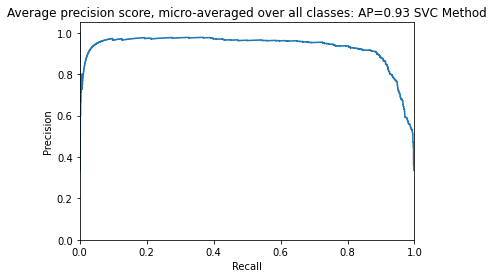

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])


precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f} SVC Method'
    .format(average_precision["micro"]))

Es necesario denotar que el paquete de Scikit-learn de precision-recall curves solo se puede utilizar directamente para clasificación binarizada. En este caso, tenemos una clasificación multiclase (0,1,2), por lo que tenemos que recurrir a un método más extenso para calcular y graficar la cuva.

In [27]:
#Accuracy de los metodos correspondientes, se evidencia que ambos son favorables en este caso.

print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))

0.936768149882904
0.9297423887587822


[[153   3   0]
 [  1 109   1]
 [  0  22 138]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       156
           1       0.81      0.98      0.89       111
           2       0.99      0.86      0.92       160

    accuracy                           0.94       427
   macro avg       0.93      0.94      0.93       427
weighted avg       0.95      0.94      0.94       427

Matriz de confusion para el metodo SVC


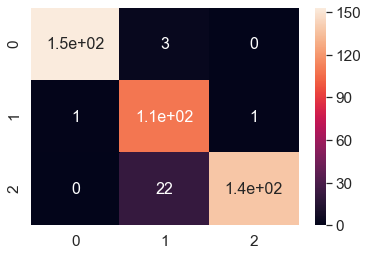

In [28]:
#Se grafica la matriz de confusion para el SVC Method.

import seaborn as sn

print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(SVC_prediction, y_test))
array=np.array(confusion_matrix(SVC_prediction,y_test))
cm=pd.DataFrame(array,range(3),range(3))
print('Matriz de confusion para el metodo SVC')
sn.set(font_scale=1.4) 
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

[[153   8   0]
 [  1 110   5]
 [  0  16 134]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       161
           1       0.82      0.95      0.88       116
           2       0.96      0.89      0.93       150

    accuracy                           0.93       427
   macro avg       0.93      0.93      0.93       427
weighted avg       0.94      0.93      0.93       427



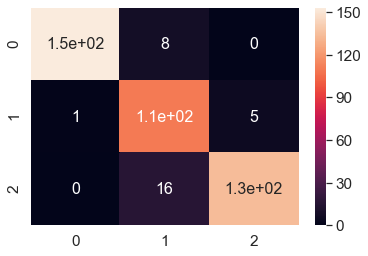

In [29]:
#Se grafica la matriz de confusion para KNN Method.

print(confusion_matrix(KNN_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

array2=np.array(confusion_matrix(KNN_prediction,y_test))
cm=pd.DataFrame(array2,range(3),range(3))
sn.set(font_scale=1.4) 
sn.heatmap(cm, annot=True, annot_kws={"size": 16})

En general, ambos algoritmos obtuvieron buenas calificaciones en las distintas métricas(accuracy,precision,recall y f1-score). 
Sin embargo, el método de SupportVectorMachine arrojó predicciones más acertadas con respecto a los valores reales que el KNN 
model. Es decir, a partir de la matriz de confusión es posible observar que ambos modelos predijeron correctamente el valor 0 
o la caracterísitca NEUTRAL, seguidamente, KNN predijo correctamente en mayor cantidad la característica POSITIVE, mientras que 
SVC model predijo correctamente y en mayor cantidad la caracterísitca NEGATIVE. Por lo tanto, se recomienda llevar a producción
este modelo, además que el accuracy es mayor para este modelo.

## Parte 5 - Despliegue

Despliegue el mejor clasificador de la etapa anterior en un endpoint. El endpoint debe procesar el objeto JSON del *body* de un POST request. El formato del objeto JSON es el siguiente:

```
{"input":[val1,val2,val3, ... ,val2548]}

```
El orden de los valores corresponde al orden de las columnas del archivo `emotions.csv`. La lista tiene 2548 valores que corresponden a los 2548 que su clasificador debe tomar como input. 

El endpoint debe retornar un json de la siguiente forma si la petición fue exitosa: 

```
{"output":"clasfOutput"}
```

Donde "clasfOutput" corresponde a la predicción del clasificador (NEUTRAL, POSITIVE o NEGATIVE).

In [30]:
# Respuesta a la parte 5 (url del endpoint)

import pickle

pickle.dump(SVC_model, open('models/final_prediction.pickle', 'wb'))

Para procesar el objeto JSON del body de un POST request se utilizó 2 scripts más que se encuentran adjuntos en la carpeta de 
este repositorio (server.py y request.py), dentro del script server.py se hace uso de una función predict, que recibe como 
atributo un POST request y retorna un JSON con las predicciones realizadas por el SVC_model entrenado previamente. Por otro lado, el script request.py contiene el input en forma de diccionario para ingresarlo de la forma JSON. Ambos scripts corrieron de forma correcta. Sin embargo, no se logró hacer la conexión con el servidor local al momento de enviar el respectivo request.
De esta forma, se concluye, que es necesario realizar un request de tipo GET para poder visualizar el endpoint de forma correcta junto con las predicciones de la forma output.


url:'http://127.0.0.1:5000/